In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [11]:
# Connect to the SQLite database
conn = sqlite3.connect('wildfires.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Fetch the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Select the first table name
table_name = table_names[21][0]  # Assuming there is at least one table in the database

In [12]:
table_names

[('spatial_ref_sys',),
 ('spatialite_history',),
 ('sqlite_sequence',),
 ('geometry_columns',),
 ('spatial_ref_sys_aux',),
 ('views_geometry_columns',),
 ('virts_geometry_columns',),
 ('geometry_columns_statistics',),
 ('views_geometry_columns_statistics',),
 ('virts_geometry_columns_statistics',),
 ('geometry_columns_field_infos',),
 ('views_geometry_columns_field_infos',),
 ('virts_geometry_columns_field_infos',),
 ('geometry_columns_time',),
 ('geometry_columns_auth',),
 ('views_geometry_columns_auth',),
 ('virts_geometry_columns_auth',),
 ('sql_statements_log',),
 ('SpatialIndex',),
 ('ElementaryGeometries',),
 ('KNN',),
 ('Fires',),
 ('idx_Fires_Shape',),
 ('idx_Fires_Shape_node',),
 ('idx_Fires_Shape_rowid',),
 ('idx_Fires_Shape_parent',),
 ('NWCG_UnitIDActive_20170109',)]

In [13]:
# Execute a query to fetch data from the selected table
cursor.execute(f"SELECT * FROM {table_name}")

# Fetch all the results and store them as a list of tuples
data = cursor.fetchall()

# Get column names from cursor description
columns = [col[0] for col in cursor.description]

# Close the cursor and the connection
cursor.close()
conn.close()

# Create a DataFrame from the fetched data
df = pd.DataFrame(data, columns=columns)

In [14]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [15]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [16]:
df.shape

(1880465, 39)

In [17]:
df2 = df[['FOD_ID','FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_NAME', 'DISCOVERY_DATE', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'FIRE_SIZE']]
df2.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10


In [18]:
state_gb = df2.groupby('STATE').count()
def prop(count):
    return count/df.shape[0]
state_props = state_gb['FOD_ID'].apply(prop)
state_props = pd.DataFrame(state_props).sort_values(by='FOD_ID', ascending = False)
state_props

,FOD_ID
STATE,
CA,0.100800
GA,0.089801
TX,0.075524
NC,0.059175
FL,0.047999
SC,0.043242
NY,0.043005
MS,0.042133
AZ,0.038068


In [19]:
state_props.iloc[:10].get('FOD_ID').sum()

0.5751486999226256

# Charlie's EDA

- Comparing size, duration, and date of discovery over seasons and geographic areas of the US
- Frequency of fires needs the size of the state to be accounted for, I also think we should get rid of AK and HI to make our lives easier (only for regional analyses)

- To do:

- Make plot for size vs seasons
- Make plot for duration vs seasons
- Make plot for date of discovery vs seasons

- Make geoplot for size vs region
- Make geoplot for duration vs region
- Make geoplot for date of discovery vs region


In [20]:
import matplotlib.pyplot as plt

In [109]:
df3 = df[['FOD_ID','FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_NAME', 'DISCOVERY_DATE', 'DISCOVERY_DOY','FIRE_YEAR','STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'FIRE_SIZE']]
df3.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,33,2005,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,133,2004,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,152,2004,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,180,2004,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,180,2004,1.0,Lightning,2453189.5,0.10


In [ ]:
df3.plot(kind='scatter', x='DISCOVERY_DOY', y='FIRE_SIZE')

In [ ]:
df3.plot(kind='bar', x='FIRE_YEAR', y='FIRE_SIZE')

In [ ]:
df2=df2.assign(Duration=df2['CONT_DATE']-df2['DISCOVERY_DATE'])
df2.plot(kind='scatter',x='FIRE_SIZE',y='Duration')

In [ ]:
top200large = df2.sort_values('FIRE_SIZE',ascending=False).iloc[:200]

In [ ]:
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import geopandas as gpd
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(top200large['LONGITUDE'], top200large['LATITUDE'])]
gdf = gpd.GeoDataFrame(top200large, geometry=geometry)

# Plot the fire locations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(10, 6))

# Set the x and y limits to zoom in on the continental US and Alaska
base.set_xlim(-180, -50)  # Longitudes from Alaska to the East Coast
base.set_ylim(15, 75)     # Latitudes from Mexico to the Northern border of Alaska

# Normalize fire size for color mapping
norm = mcolors.Normalize(vmin=gdf['FIRE_SIZE'].min(), vmax=gdf['FIRE_SIZE'].max())
cmap = cm.inferno

# Get color values from colormap
colors = cmap(norm(gdf['FIRE_SIZE']))

# Define the range of marker sizes
min_marker_size = 2
max_marker_size = 40

# Normalize fire size for marker size mapping
size_norm = mcolors.Normalize(vmin=gdf['FIRE_SIZE'].min(), vmax=gdf['FIRE_SIZE'].max())

# Calculate marker sizes based on fire size
marker_sizes = np.interp(gdf['FIRE_SIZE'], (gdf['FIRE_SIZE'].min(), gdf['FIRE_SIZE'].max()), (min_marker_size, max_marker_size))

# Plot the points with a color gradient and variable marker sizes based on fire size
gdf.plot(ax=base, marker='o', color=colors, markersize=marker_sizes)


# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Fire Size')

# Add title and labels
plt.title('Top 200 Largest Wildfires in the US (1992-2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
top200long = df2.sort_values('Duration',ascending=False).iloc[:200]

In [ ]:
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import geopandas as gpd
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(top200large['LONGITUDE'], top200large['LATITUDE'])]
gdf = gpd.GeoDataFrame(top200large, geometry=geometry)

# Plot the fire locations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(10, 6))

# Set the x and y limits to zoom in on the continental US and Alaska
base.set_xlim(-180, -50)  # Longitudes from Alaska to the East Coast
base.set_ylim(15, 75)     # Latitudes from Mexico to the Northern border of Alaska

# Normalize fire size for color mapping
norm = mcolors.Normalize(vmin=gdf['Duration'].min(), vmax=gdf['Duration'].max())
cmap = cm.plasma

# Get color values from colormap
colors = cmap(norm(gdf['Duration']))

# Plot the points with a color gradient based on fire size
gdf.plot(ax=base, marker='o', color=colors, markersize=5)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Duration')

# Add title and labels
plt.title('Top 200 Longest Lasting Wildfires in the US (1992-2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# Predicting FIRE_SIZE

Viable Independent Variables:

    LATITUDE: Geographic coordinate, useful predictor.
    LONGITUDE: Geographic coordinate, useful predictor.
    STATE: Categorical variable, can be encoded and used as a predictor.
    DISCOVERY_DATE: Date of fire discovery, useful predictor (consider transforming to useful date features like year, month, day).
    DISCOVERY_DOY: Day of the year, useful predictor (might capture seasonal effects).
    FIRE_YEAR: Year of the fire, useful predictor.
    STAT_CAUSE_CODE: Categorical code for the cause, can be encoded and used as a predictor.
    CONT_DATE: Date when the fire was contained, useful predictor but consider the potential correlation with DISCOVERY_DATE.

Non-Viable Independent Variables:

    FOD_ID: Unique identifier, not useful as a predictor.
    FIRE_NAME: Unique name, not useful as a predictor.
    STAT_CAUSE_DESCR: Description, redundant with STAT_CAUSE_CODE.

In [110]:
df3

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,33,2005,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,133,2004,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,152,2004,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,180,2004,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,180,2004,1.0,Lightning,2453189.5,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,A,40.481637,-122.389375,CA,ODESSA 2,2457291.5,269,2015,13.0,Missing/Undefined,2457291.5,0.01
1880461,300348373,A,37.617619,-120.938570,CA,None,2457300.5,278,2015,9.0,Miscellaneous,NaN,0.20
1880462,300348375,A,37.617619,-120.938570,CA,None,2457144.5,122,2015,13.0,Missing/Undefined,NaN,0.10
1880463,300348377,B,37.672235,-120.898356,CA,None,2457309.5,287,2015,13.0,Missing/Undefined,NaN,2.00


In [111]:
first3k = df3.iloc[:3000].drop(columns=['FOD_ID','FIRE_SIZE_CLASS','FIRE_NAME','STAT_CAUSE_DESCR','DISCOVERY_DATE','CONT_DATE'])
first3k['STAT_CAUSE_CODE'] = first3k['STAT_CAUSE_CODE'].astype('category')
first3k=first3k.dropna()
first3k = pd.get_dummies(first3k, columns=['STATE'], drop_first=True)
first3k

,LATITUDE,LONGITUDE,DISCOVERY_DOY,FIRE_YEAR,STAT_CAUSE_CODE,FIRE_SIZE,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,...,STATE_NV,STATE_OH,STATE_OK,STATE_OR,STATE_SC,STATE_SD,STATE_TX,STATE_UT,STATE_WA,STATE_WY
0,40.036944,-121.005833,33,2005,9.0,0.10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.933056,-120.404444,133,2004,1.0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.984167,-120.735556,152,2004,5.0,0.10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38.559167,-119.913333,180,2004,1.0,0.10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38.559167,-119.933056,180,2004,1.0,0.10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,44.781667,-118.536944,270,2005,4.0,0.20,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2996,45.173889,-117.033056,219,2005,1.0,0.10,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2997,42.353056,-120.620000,278,2005,4.0,0.10,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2998,45.701944,-115.931389,232,2005,1.0,0.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

covars = list(first3k.drop(columns=['FIRE_SIZE']).columns)

def find_bicformula(covars):
    if not covars:
        return float('inf'), 'FIRE_SIZE ~ 1'  # Return a high BIC for invalid models
    formula = 'FIRE_SIZE ~ ' + ' + '.join(covars)
    model = smf.ols(formula=formula, data=first3k).fit()
    return model.bic, formula

best_bic, best_formula = find_bicformula(covars)
while len(covars) > 0:
    bics_wo_covar = []
    for c in covars:
        reduced_covars = [co for co in covars if co != c]
        bic, formula = find_bicformula(reduced_covars)
        bics_wo_covar.append((bic, c, formula))
    bics_wo_covar.sort()
    new_bic, covar_to_remove, new_formula = bics_wo_covar[0]
    if new_bic < best_bic:
        best_bic = new_bic
        best_formula = new_formula
        covars.remove(covar_to_remove)
    else:
        break

print("Formula for optimal model:", best_formula)
print("BIC:", best_bic)

Formula for optimal model: FIRE_SIZE ~ FIRE_YEAR
BIC: 46386.51191802443


/var/folders/ch/hyjw6whx3g9gshnp58738jc80000gp/T/ipykernel_34942/1876127308.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, y)
/Users/charlie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/charlie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+08, tolerance: 9.234e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fas

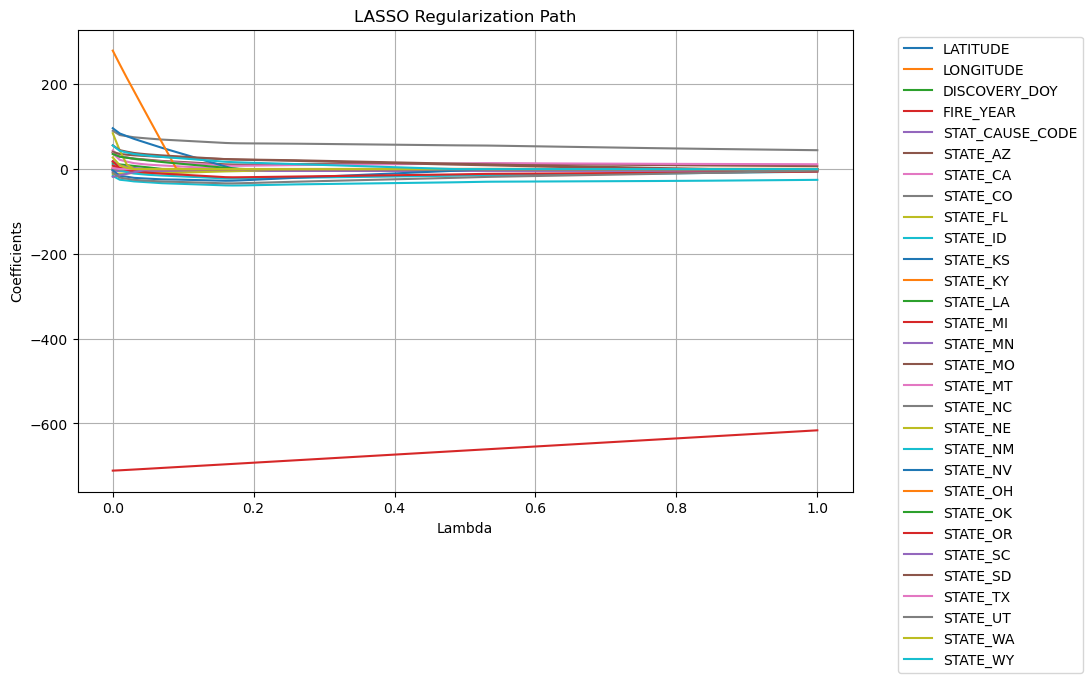

In [115]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = first3k.drop(columns=['FIRE_SIZE'])
y = first3k['FIRE_SIZE']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lambda_vals=np.arange(0,1.01,0.01)
coefs = []
for lamb in lambda_vals:
    lasso = Lasso(alpha=lamb, max_iter=10000)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
coefs = np.array(coefs)
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(lambda_vals, coefs[:, i], label=X.columns[i])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('LASSO Regularization Path')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [114]:
covars = list(first3k.drop(columns=['FIRE_SIZE']).columns)
def find_aicformula(covars):
    formula = 'FIRE_SIZE ~ ' + ' + '.join(covars)
    model = smf.ols(formula=formula, data=first3k).fit()
    return model.aic, formula

best_aic, best_formula = find_aicformula(covars)
while len(covars) > 0:
    aics_wo_covar = []
    for c in covars:
        reduced_covars = [co for co in covars if co != c]
        aic, formula = find_aicformula(reduced_covars)
        aics_wo_covar.append((aic, c, formula))
    aics_wo_covar.sort()
    new_aic, covar_to_remove, new_formula = aics_wo_covar[0]
    if new_aic < best_aic:
        best_aic = new_aic
        best_formula = new_formula
        covars.remove(covar_to_remove)
    else:
        break

print("Formula for optimal model using AIC:", best_formula)
print("AIC:", best_aic)

Formula for optimal model using AIC: FIRE_SIZE ~ FIRE_YEAR + STAT_CAUSE_CODE + STATE_AZ + STATE_CO
AIC: 46368.79415997342


In [116]:
aa=smf.ols(formula=best_formula, data=first3k).fit()
print(aa.summary())

                            OLS Regression Results                            
Dep. Variable:              FIRE_SIZE   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.380
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.34e-12
Time:                        04:17:24   Log-Likelihood:                -23172.
No. Observations:                3000   AIC:                         4.637e+04
Df Residuals:                    2988   BIC:                         4.644e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.4

In [117]:
formula = 'FIRE_SIZE ~ ' + ' + '.join(list(first3k.drop(columns=['FIRE_SIZE']).columns))
modelll = smf.ols(formula=formula, data=first3k).fit()
print(modelll.summary())

                            OLS Regression Results                            
Dep. Variable:              FIRE_SIZE   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.238
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.83e-05
Time:                        04:20:33   Log-Likelihood:                -23171.
No. Observations:                3000   AIC:                         4.642e+04
Df Residuals:                    2962   BIC:                         4.665e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.42